In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# STEP 1: IMPORTING AND EXPLAINING THE DATASET

In [2]:
df=pd.read_csv("who_suicide_statistics.csv")

df.head()


,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
country        43776 non-null object
year           43776 non-null int64
sex            43776 non-null object
age            43776 non-null object
suicides_no    41520 non-null float64
population     38316 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


#####  POPULATION AND SUICIDES_NO SHOWS THAT THEY HAVE NULL VALUES
#####  Suicides no and Population are float type,will change these to int
#####  Age and Sex are object type (categorical) , will change these to int (encode)  

### Step2: Removing Outliers (REPLACING NULL WITH MEAN) 

In [4]:
df=df.fillna(df.mean())

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
country        43776 non-null object
year           43776 non-null int64
sex            43776 non-null object
age            43776 non-null object
suicides_no    43776 non-null float64
population     43776 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


#### NULL VALUES ARE REPLACED

In [6]:
len(df['country'].unique())

141

# STEP2: EDA AND REMOVING OUTLIERS

### Suicide comparision by Gender, in age classes

In [7]:
#from numpy import median

#plt.figure(figsize=(8,8))
#plt.title('Suicide Correlation', fontsize=14)
#sns.catplot(x="sex", y="suicides_no",col='age', data=df, estimator=median,height=4, aspect=.7,kind='bar')

C:\Users\Ahmed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'total suicides committed by male and female')

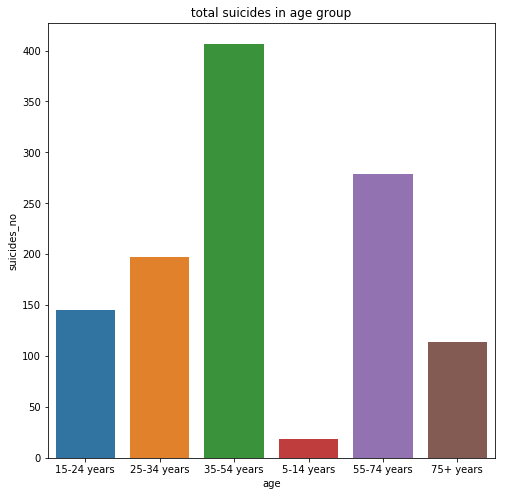

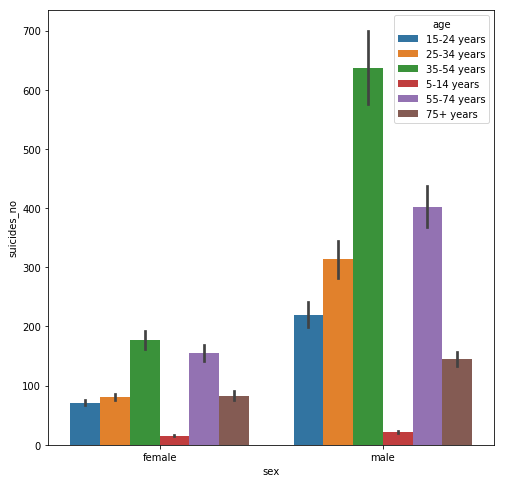

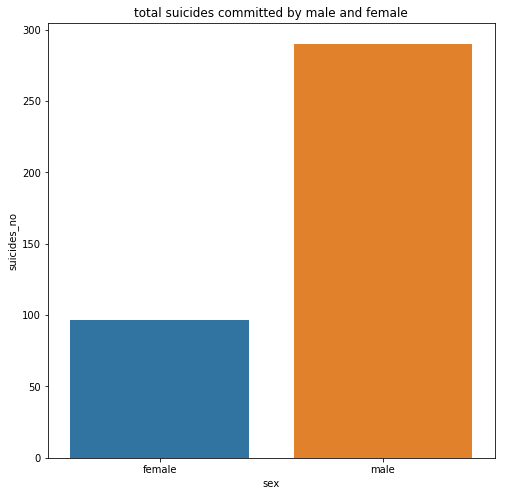

In [8]:

plt.figure(figsize=(8,8))
sns.barplot(x='age',y='suicides_no',data=df,ci=0)
plt.title(" total suicides in age group ")



plt.figure(figsize=(8,8))
#plt.title('Suicide Correlation', fontsize=14)
p = sns.barplot(x='sex', y='suicides_no', hue='age', data=df)


plt.figure(figsize=(8,8))
sns.barplot(x='sex',y='suicides_no',data=df,ci=0)
plt.title("total suicides committed by male and female")

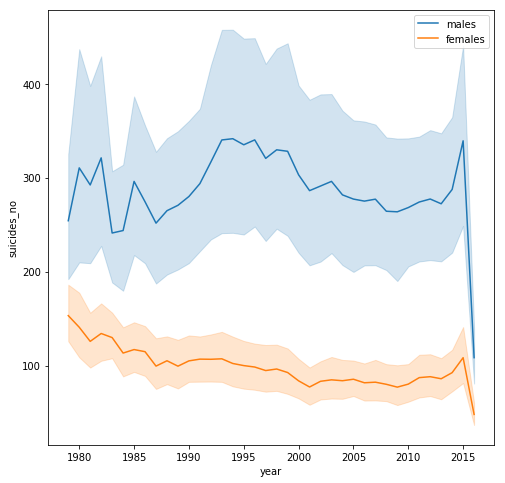

In [9]:
male_population = df.loc[df.loc[:, 'sex']=='male',:]
female_population = df.loc[df.loc[:, 'sex']=='female',:]


plt.figure(figsize=(8,8))
#plt.title('Suicide Correlation', fontsize=14)
p = sns.lineplot(x='year', y='suicides_no', data=male_population)
q = sns.lineplot(x='year', y='suicides_no', data=female_population)

_ = plt.legend(['males', 'females'])

In [82]:
df['age'].unique()

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

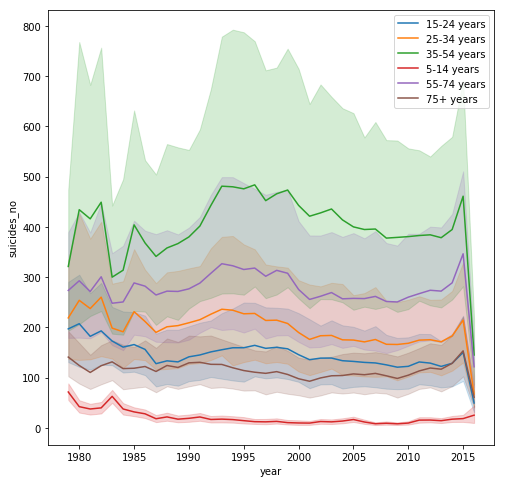

In [84]:
age1 = df.loc[df.loc[:, 'age']=='15-24 years',:]
age2 = df.loc[df.loc[:, 'age']=='25-34 years',:]
age3 = df.loc[df.loc[:, 'age']=='35-54 years',:]
age4 = df.loc[df.loc[:, 'age']=='5-14 years',:]
age5 = df.loc[df.loc[:, 'age']=='55-74 years',:]
age6 = df.loc[df.loc[:, 'age']=='75+ years',:]



plt.figure(figsize=(8,8))
#plt.title('Suicide Correlation', fontsize=14)
p = sns.lineplot(x='year', y='suicides_no', data=age1)
q = sns.lineplot(x='year', y='suicides_no', data=age2)
r = sns.lineplot(x='year', y='suicides_no', data=age3)
s = sns.lineplot(x='year', y='suicides_no', data=age4)
t = sns.lineplot(x='year', y='suicides_no', data=age5)
u = sns.lineplot(x='year', y='suicides_no', data=age6)
_ = plt.legend(['15-24 years', '25-34 years','35-54 years','5-14 years','55-74 years','75+ years'])

##### encoding categorical and chaning type from float to int

In [10]:
df1=df.replace(['male','female'],[0,1])
df1=df1.replace(['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'],[0,1,2,3,4,5])
df1['population']=df['population'].astype(int)
df1['suicides_no']=df['suicides_no'].astype(int)

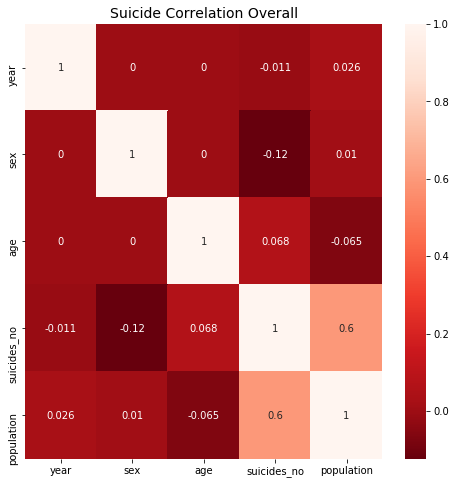

In [11]:

plt.figure(figsize=(8,8))
plt.title('Suicide Correlation Overall', fontsize=14)
_ = sns.heatmap(df1.corr(), annot=True, cmap='Reds_r')

In [12]:
df1[df1['year']==2016]

,country,year,sex,age,suicides_no,population
708,Anguilla,2016,1,1,0,1664091
709,Anguilla,2016,1,2,0,1664091
710,Anguilla,2016,1,3,0,1664091
711,Anguilla,2016,1,0,0,1664091
712,Anguilla,2016,1,4,0,1664091
713,Anguilla,2016,1,5,0,1664091
714,Anguilla,2016,0,1,0,1664091
715,Anguilla,2016,0,2,0,1664091
716,Anguilla,2016,0,3,0,1664091
717,Anguilla,2016,0,0,0,1664091


In [13]:
#US = df1.loc[(df['country']=='United States of America') & (df1['year']) & (df1['suicides_no']), ['country', 'year', 'suicides_no',]]
#US.sort_values(by=['year'])

In [14]:
df['country'].unique()


array(['Albania', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Falkland Islands (Malvinas)', 'Fiji',
       'Finland', 'France', 'French Guiana', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland',
       'Iran (Islamic Rep of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania

In [15]:
df[(df['country']=='Saudi Arabia')==True]

,country,year,sex,age,suicides_no,population
34716,Saudi Arabia,2009,female,15-24 years,3.0,1.664091e+06
34717,Saudi Arabia,2009,female,25-34 years,2.0,1.664091e+06
34718,Saudi Arabia,2009,female,35-54 years,0.0,1.664091e+06
34719,Saudi Arabia,2009,female,5-14 years,2.0,1.664091e+06
34720,Saudi Arabia,2009,female,55-74 years,3.0,1.664091e+06
34721,Saudi Arabia,2009,female,75+ years,0.0,1.664091e+06
34722,Saudi Arabia,2009,male,15-24 years,18.0,1.664091e+06
34723,Saudi Arabia,2009,male,25-34 years,12.0,1.664091e+06
34724,Saudi Arabia,2009,male,35-54 years,17.0,1.664091e+06
34725,Saudi Arabia,2009,male,5-14 years,2.0,1.664091e+06


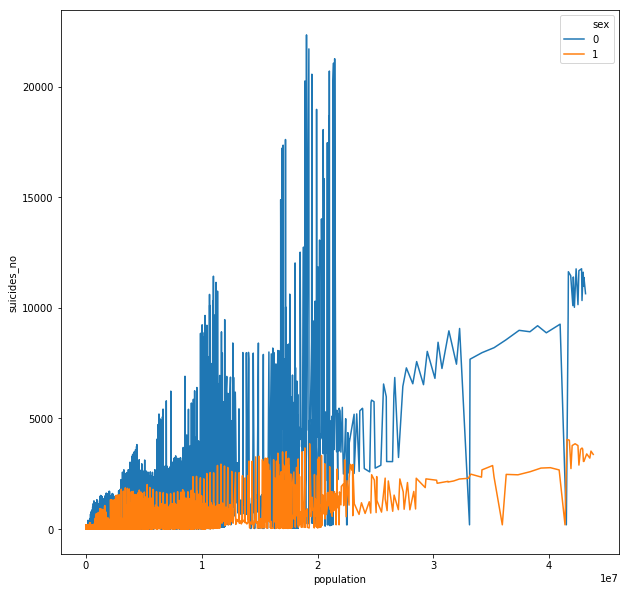

In [16]:
 
plt.figure(figsize=(10,10))
ax = sns.lineplot(x="population", y="suicides_no", hue="sex",data=df1)

In [17]:
df1.shape

(43776, 6)

In [18]:
df1.describe()

,year,sex,age,suicides_no,population
count,43776.000000,43776.000000,43776.000000,43776.000000,4.377600e+04
mean,1998.502467,0.500000,2.500000,193.299137,1.664091e+06
std,10.338711,0.500006,1.707845,779.687349,3.412201e+06
min,1979.000000,0.000000,0.000000,0.000000,2.590000e+02
25%,1990.000000,0.000000,1.000000,1.000000,1.184982e+05
50%,1999.000000,0.500000,2.500000,17.000000,5.177775e+05
75%,2007.000000,1.000000,4.000000,124.000000,1.664091e+06
max,2016.000000,1.000000,5.000000,22338.000000,4.380521e+07


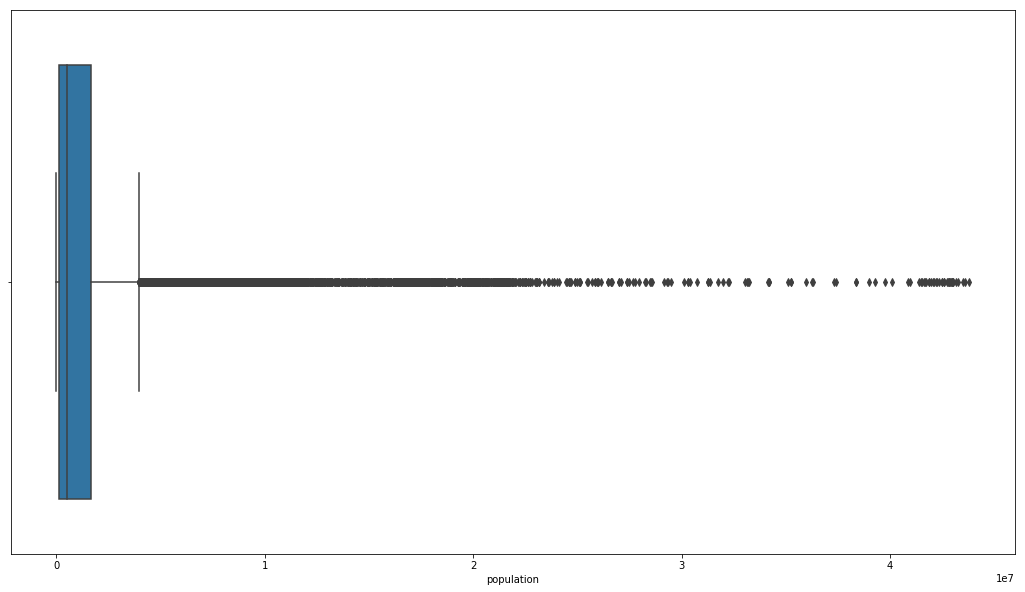

In [19]:
 
plt.figure(figsize=(18,10))
sns.boxplot(x="population",data=df1)

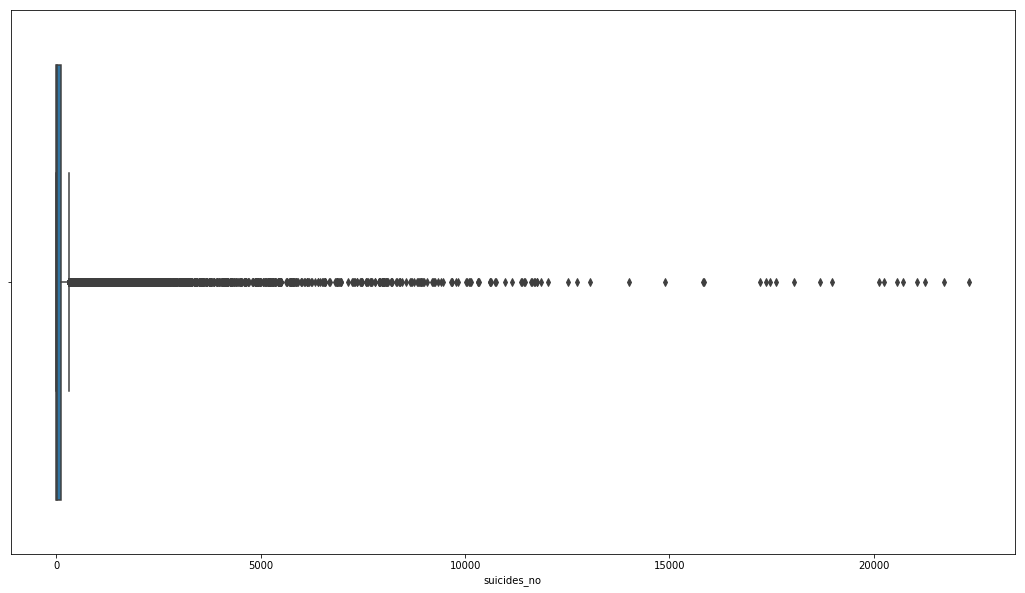

In [20]:
 
plt.figure(figsize=(18,10))
sns.boxplot(x="suicides_no",data=df1)

In [21]:
Q1=df['suicides_no'].quantile(0.25)

Q3=df['suicides_no'].quantile(0.75)
IQR=Q3-Q1
print("Q1: [%d] ,Q3: [%d]", Q1,Q3,IQR)
print(df['suicides_no'].shape)
df_copy=df[~np.logical_or(df['suicides_no']<(Q1-1.5*IQR),df['suicides_no']>(Q3+1.5*IQR))]
var=Q1-1.5*IQR

var=Q3+1.5*IQR

df[df['suicides_no']>var]

Q1: [%d] ,Q3: [%d] 1.0 124.0 123.0
(43776,)


,country,year,sex,age,suicides_no,population
1064,Argentina,1979,male,35-54 years,421.0,3299000.0
1066,Argentina,1979,male,55-74 years,395.0,1852000.0
1076,Argentina,1980,male,35-54 years,447.0,3086700.0
1078,Argentina,1980,male,55-74 years,489.0,1766100.0
1088,Argentina,1981,male,35-54 years,547.0,3159800.0
1090,Argentina,1981,male,55-74 years,537.0,1834200.0
1100,Argentina,1982,male,35-54 years,450.0,3350000.0
1102,Argentina,1982,male,55-74 years,483.0,1989000.0
1112,Argentina,1983,male,35-54 years,338.0,3405000.0
1114,Argentina,1983,male,55-74 years,502.0,2021000.0


In [22]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
            
   
    return outliers

dfcopy=df1
threshold=3
lst=[]
count=0
mean_1=np.mean(df1['population'])
std_1=np.std(df1['population'])
for y in df1['population']:
    z_score=(y-mean_1)/std_1
    lst.append(z_score)
    if np.abs(z_score) > threshold:
        count=count+1
dfcopy['zScore_pop']=lst  

dfcopy1=dfcopy[np.abs(dfcopy['zScore_pop']) < threshold]    
dfcopy1.shape
print("After removing outliers of Population, data left : %.0f", dfcopy1.shape)

After removing outliers of Population, data left : %.0f (42800, 7)


In [23]:
outlier_datapoints = detect_outlier(df1['population'])
out=pd.DataFrame(outlier_datapoints)


In [24]:
lst=[]
count=0
mean_1=np.mean(dfcopy1['suicides_no'])
std_1=np.std(dfcopy1['suicides_no'])
for y in dfcopy1['suicides_no']:
    z_score=(y-mean_1)/std_1
    lst.append(z_score)
    if np.abs(z_score) > threshold:
        count=count+1
dfcopy1['zScore_sui']=lst  

df2=dfcopy1[np.abs(dfcopy1['zScore_sui']) < threshold]    
df2.shape
print("After removing outliers of Scuicide_no, data left : %.0f", df2.shape)

After removing outliers of Scuicide_no, data left : %.0f (42219, 8)


C:\Users\Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


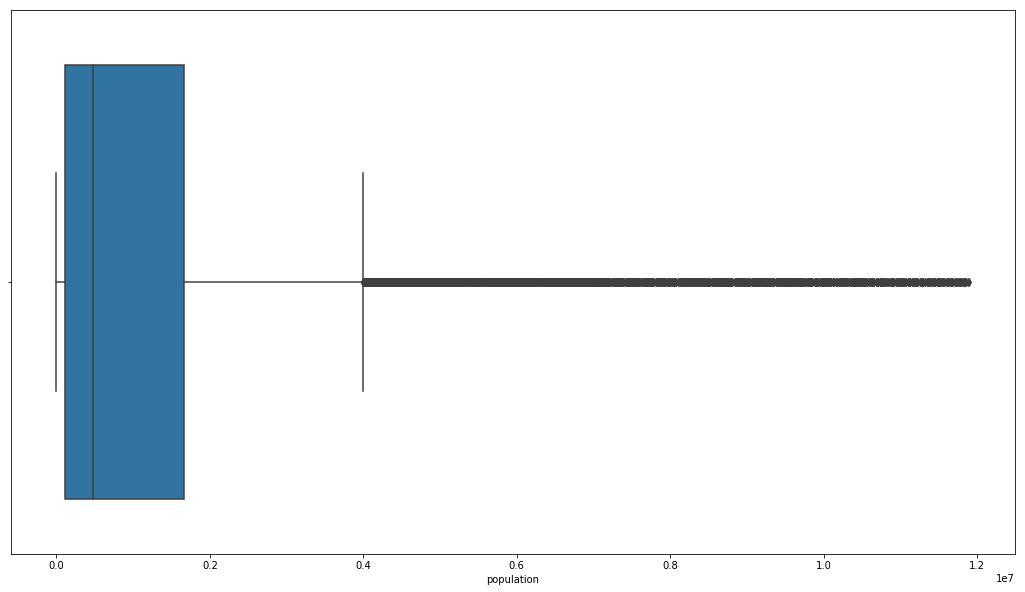

In [25]:
plt.figure(figsize=(18,10))
sns.boxplot(x="population",data=df2)

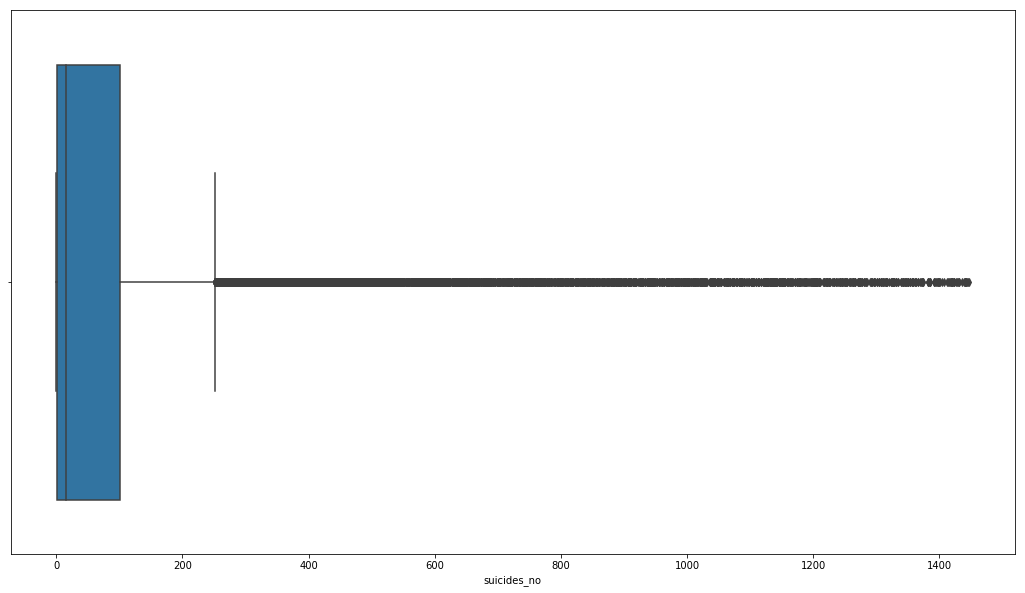

In [26]:
plt.figure(figsize=(18,10))
sns.boxplot(x="suicides_no",data=df2)

In [27]:
df2['suicdes_per_100k']=(df2['suicides_no']/df2['population']*100000)

C:\Users\Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
df2['suicdes_per_100k']=df2['suicdes_per_100k'].astype(int)

C:\Users\Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df2['suicdes_per_100k']=round(df2['suicdes_per_100k'])

C:\Users\Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
lst=[]
count=0
mean_1=np.mean(df2['suicdes_per_100k'])
std_1=np.std(df2['suicdes_per_100k'])
for y in df2['suicdes_per_100k']:
    z_score=(y-mean_1)/std_1
    lst.append(z_score)
    if np.abs(z_score) > threshold:
        count=count+1
df2['zScore_sui_100k']=lst  

df2=df2[np.abs(df2['zScore_sui_100k']) < threshold]    
df2.shape
print("After removing outliers of Scuicide_per_100k, data left : %.0f", df2.shape)

After removing outliers of Scuicide_per_100k, data left : %.0f (42056, 10)


C:\Users\Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [31]:
lst=pd.DataFrame({'suicide': df2.suicdes_per_100k})
#lst.sort_values(by=['suicide'])

#lst[lst[suicide]>2000]
len(lst[lst['suicide']>1000])

97

In [32]:
df2.loc[18665]

country              Iceland
year                    1980
sex                        1
age                        5
suicides_no              193
population              5600
zScore_pop         -0.486053
zScore_sui          0.134152
suicdes_per_100k        3446
zScore_sui_100k      2.99879
Name: 18665, dtype: object

In [33]:
from bokeh.io import output_notebook
output_notebook()


Loading BokehJS ...

In [34]:
from bokeh.io import show 
from bokeh.plotting import figure

In [35]:
from bokeh.models import ColumnDataSource
source=ColumnDataSource(dict(
    y=df2.loc[df['year']==2015].population,
    x=df2.loc[df['year']==2015].suicdes_per_100k,
    country=df2.loc[df['year']==2015].country,
    population=df.loc[df['year']==2015].population,
    age=df.loc[df['year']==2015].age
    

))


In [91]:
from bokeh.models import HoverTool

PLOT_OPTS=dict(
    height=200,
    y_axis_type='log',
    y_range=(1000,1000000),
    x_range=(0,40),

      

)


In [92]:

plt.figure(figsize=(18,10))
p=figure(**PLOT_OPTS)
p.circle(x='x',y='y',source=source)

show(p)

<Figure size 1296x720 with 0 Axes>

In [93]:
df2['suicdes_per_100k'].describe()

count    38220.000000
mean         6.874150
std          9.077463
min          0.000000
25%          0.000000
50%          3.000000
75%         11.000000
max         37.000000
Name: suicdes_per_100k, dtype: float64

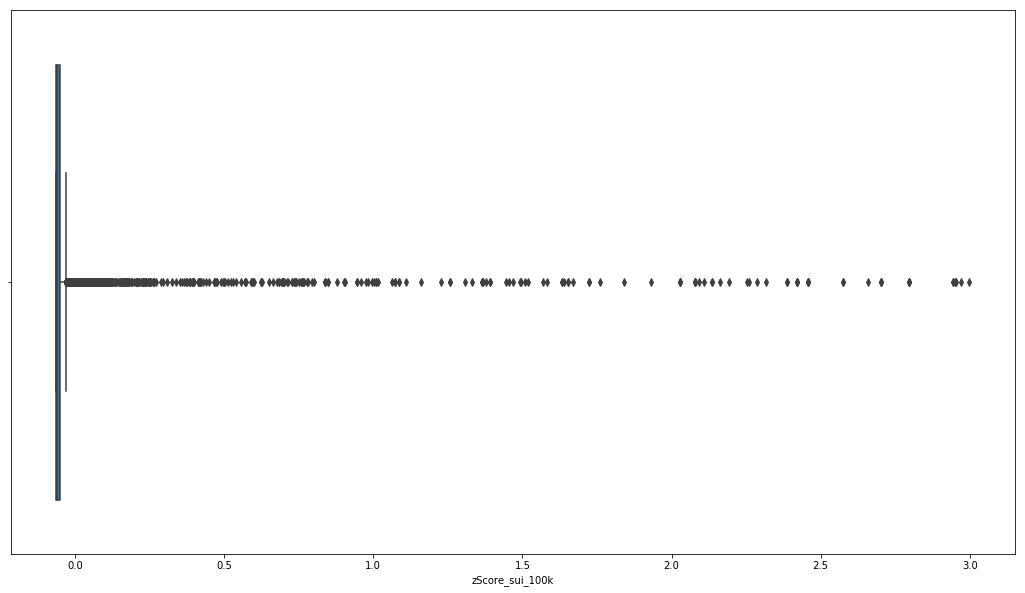

In [39]:
plt.figure(figsize=(18,10))
sns.boxplot(x="zScore_sui_100k",data=df2)

In [40]:
len(df2[np.logical_and(df2['suicdes_per_100k']>1000,df2['suicdes_per_100k']<=2000)].suicdes_per_100k)

51

In [41]:
len(df2[df2['suicdes_per_100k']>2000].suicdes_per_100k)

46

In [42]:
len(df2[np.logical_and(df2['suicdes_per_100k']>100,df2['suicdes_per_100k']<=1000)].suicdes_per_100k)

607

In [43]:
len(df2[np.logical_and(df2['suicdes_per_100k']>50,df2['suicdes_per_100k']<100)].suicdes_per_100k)

1840

In [44]:
Q1=df2['suicdes_per_100k'].quantile(0.25)

Q3=df2['suicdes_per_100k'].quantile(0.75)
IQR=Q3-Q1
print("Q1: [%d] ,Q3: [%d]", Q1,Q3,IQR)
print(df2['suicdes_per_100k'].shape)
df2_copy=df2[~np.logical_or(df2['suicdes_per_100k']<(Q1-1.5*IQR),df2['suicdes_per_100k']>(Q3+1.5*IQR))]
df2_copy.shape

Q1: [%d] ,Q3: [%d] 0.0 15.0 15.0
(42056,)


(38220, 10)

In [45]:
df2_copy.suicdes_per_100k.describe()

count    38220.000000
mean         6.874150
std          9.077463
min          0.000000
25%          0.000000
50%          3.000000
75%         11.000000
max         37.000000
Name: suicdes_per_100k, dtype: float64

In [46]:
df2=df2_copy

In [47]:
df3=df2[['country','year','sex','age','population','suicdes_per_100k']]
df4=df2[['population','suicdes_per_100k']]
df4.head()

,population,suicdes_per_100k
24,289700,4
25,257200,1
26,278800,2
27,311000,0
28,144600,0


In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3["country"]=le.fit_transform(df3["country"])


C:\Users\Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# SIMPLE LINEAR REGRESSION


In [49]:
x=df4.iloc[:,:-1].values
y=df4.iloc[:,1].values


In [50]:

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler


In [52]:
x_train.reshape(-1,1)
x_test.reshape(-1,1)
sc_X=StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_test=sc_X.transform(x_test)

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [54]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [55]:
regr = linear_model.LinearRegression()

In [56]:
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

In [57]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Mean absolute error: %.2f"% mean_absolute_error(y_test,y_pred))

Coefficients: 
 [-3.3319579e-07]
Mean squared error: 82.17
Variance score: 0.01
Mean absolute error: 7.19


In [58]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

9.064492014546898


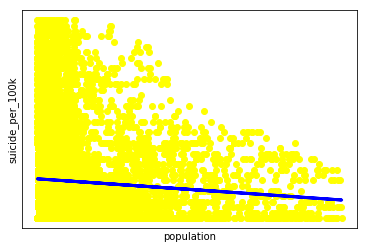

In [59]:
plt.scatter(x_test, y_test,  color='yellow')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xlabel("population")
plt.ylabel("suicide_per_100k")
plt.xticks(())
plt.yticks(())

plt.show()


# RANDOM FOREST REGRESSION

In [60]:
x1=df3.iloc[:,0:5].values
y1=df3.iloc[:,-1].values
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1,test_size=0.3, random_state=42)

sc_X=StandardScaler()
x_train1=sc_X.fit_transform(x_train1)
x_test1=sc_X.transform(x_test1)

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [61]:
from sklearn.ensemble import RandomForestRegressor


In [62]:
rf = RandomForestRegressor(n_estimators = 50, oob_score=True,random_state=0)
# Train the model on training data
rf.fit(x_train1, y_train1)
y_pred1 = rf.predict(x_test1)


In [63]:

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test1, y_pred1))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test1, y_pred1))
print("Mean absolute error: %.2f"% mean_absolute_error(y_test1,y_pred1))

Mean squared error: 13.76
Variance score: 0.83
Mean absolute error: 1.85


In [64]:
rmse=np.sqrt(mean_squared_error(y_test1, y_pred1))
print(rmse)

3.7100154846327658


# MULTIPLE LINEAR REGRESSION

In [65]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
y_pred2=regressor.predict(x_test1)

In [67]:
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test1, y_pred2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test1, y_pred2))
print("Mean absolute error: %.2f"% mean_absolute_error(y_test1,y_pred2))

Coefficients: 
 [ 0.54765057 -0.71591491 -2.70544155  2.617829   -0.3766323 ]
Mean squared error: 69.32
Variance score: 0.16
Mean absolute error: 6.27


In [68]:
#finding significant predictor

In [69]:
import statsmodels.formula.api as sm

In [70]:
x1=np.append(arr=np.ones((38220,1)).astype(int),values=x1,axis=1)

In [71]:
x_opt=x1[:,[0,1,2,3,4,5]]

In [72]:
x1

array([[      1,       0,    1987,       1,       1,  289700],
       [      1,       0,    1987,       1,       2,  257200],
       [      1,       0,    1987,       1,       3,  278800],
       ...,
       [      1,     140,    1990,       0,       0, 1664091],
       [      1,     140,    1990,       0,       4, 1664091],
       [      1,     140,    1990,       0,       5, 1664091]],
      dtype=int64)

In [73]:
regressor_ols=sm.OLS(endog=y1,exog=x_opt).fit()

In [74]:
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     1573.
Date:                Sun, 05 May 2019   Prob (F-statistic):               0.00
Time:                        17:23:17   Log-Likelihood:            -1.3496e+05
No. Observations:               38220   AIC:                         2.699e+05
Df Residuals:                   38214   BIC:                         2.700e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        142.7752      8.294     17.215      0.000     126.520     159.031
x1             0.0129      0.001     12.524      0.000       0.011       0.015
x2            -0.0686      0.004    -16.533      0.000      -0.077      -0.060
x3            -5.4490      0.085    -64.115      0.000      -5.616      -5.282
x4             1.5037      0.025     59.823      0.000       1.454       1.553
x5          -2.24e-07   2.29e-08     -9.790      0.000   -2.69e-07   -1.79e-07
==============================================================================
Omnibus:                     5432.429   Durbin-Watson:                   1.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8293.464
Skew:                           1.024   Prob(JB):                         0.00
Kurtosis:                       4.007   Cond. No.                     4.44e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.44e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
#p_value of all variables is less than 0.05, so model is fitted correctly, all variables are significant

# DECISION TREE REGRESSION

In [76]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
x1=df3.iloc[:,0:5].values
y1=df3.iloc[:,-1].values
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1,test_size=0.3, random_state=42)

sc_X=StandardScaler()
x_train1=sc_X.fit_transform(x_train1)
x_test1=sc_X.transform(x_test1)

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [78]:
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x_train1,y_train1)
y_pred=regressor.predict(x_test1)


In [79]:
print(y_pred)

[ 1.  3.  0. ... 11.  0.  2.]


In [80]:
print(y_test1)

[ 1  4  0 ... 14  0  2]


In [81]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test1, y_pred2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test1, y_pred2))
print("Mean absolute error: %.2f"% mean_absolute_error(y_test1,y_pred))

Mean squared error: 69.32
Variance score: 0.16
Mean absolute error: 2.11
